In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [36]:
data = pd.read_csv('/content/sample_data/Pre-Registration Monthly Summary for Moudud.csv')
data.head()

,obj_id,value2
0,2016-03,90434
1,2016-04,47651
2,2016-05,5940
3,2016-06,2278
4,2016-07,18


In [37]:
data = data.iloc[19:]

In [38]:
# Convert 'Date' column to datetime
data['obj_id'] = pd.to_datetime(data['obj_id'])
data.head()

,obj_id,value2
19,2018-02-01,12922
20,2018-03-01,9740
21,2018-04-01,7819
22,2018-05-01,6089
23,2018-06-01,4412


In [39]:
# Define the cutoff date
cutoff_date = pd.to_datetime('2023-05-01')

# Filter the DataFrame to keep rows only before the cutoff date
data = data[data['obj_id'] <= cutoff_date]

# If you want to reset the index
data.reset_index(drop=True, inplace=True)
data

,obj_id,value2
0,2018-02-01,12922
1,2018-03-01,9740
2,2018-04-01,7819
3,2018-05-01,6089
4,2018-06-01,4412
...,...,...
57,2023-01-01,9497
58,2023-02-01,10337
59,2023-03-01,9435
60,2023-04-01,2193


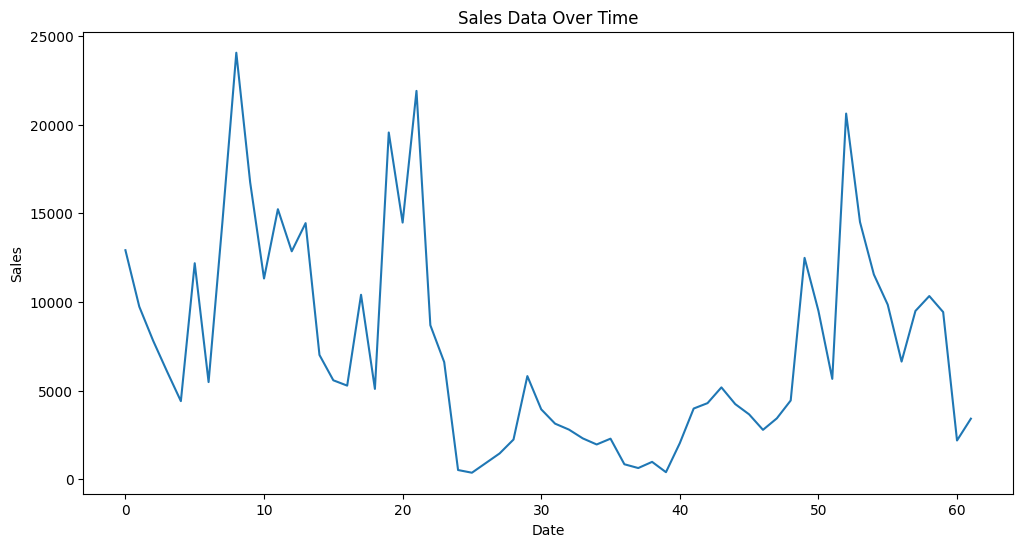

In [40]:
plt.figure(figsize=(12, 6))
plt.plot(data['value2'])
plt.title('Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [41]:
from statsmodels.tsa.stattools import adfuller

In [42]:
test_result=adfuller(data['value2'])

In [43]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [44]:
adfuller_test(data['value2'])

ADF Test Statistic : -2.6515935087062297
p-value : 0.08279573489042119
#Lags Used : 2
Number of Observations Used : 59
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [45]:
# Assuming your data is stored in a DataFrame df with a 'value2' column
data['value2_diff'] = data['value2'].diff()
data.head()

,obj_id,value2,value2_diff
0,2018-02-01,12922,NaN
1,2018-03-01,9740,-3182.0
2,2018-04-01,7819,-1921.0
3,2018-05-01,6089,-1730.0
4,2018-06-01,4412,-1677.0


In [46]:
# data['Sales First Difference']=data['value2']-data['value2'].shift(12)

In [47]:
adfuller_test(data['value2_diff'].dropna())

ADF Test Statistic : -10.840534360526496
p-value : 1.620259739442841e-19
#Lags Used : 0
Number of Observations Used : 60
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: >

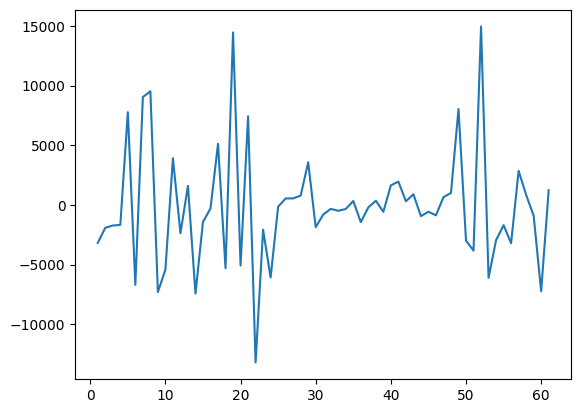

In [48]:
data['value2_diff'].plot()

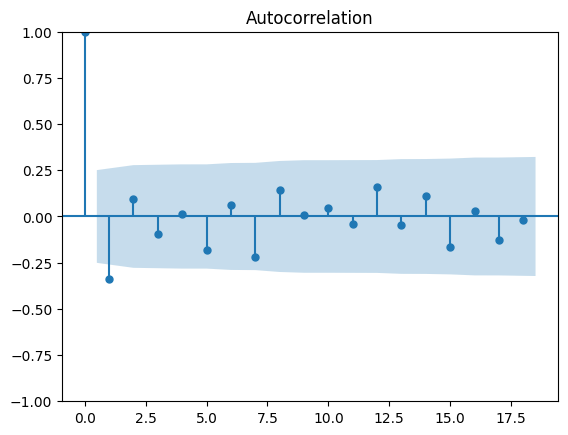

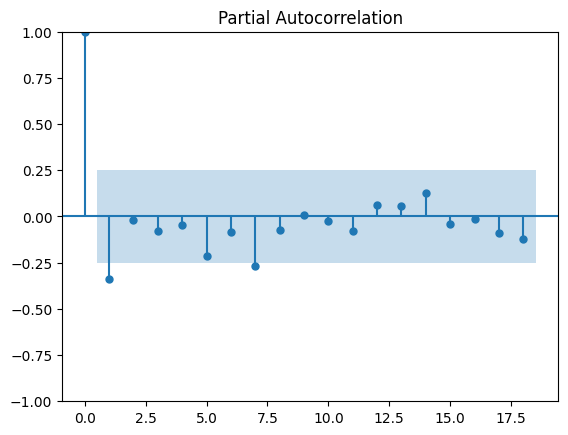

In [49]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data['value2_diff'].dropna())
pacf = plot_pacf(data['value2_diff'].dropna())


In [50]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
# order=(p, d, q))
model=ARIMA(data['value2'],order=(6,1,1))
result=model.fit()

In [51]:
forecast_steps = 12  # Adjust the number of steps as needed

# Make forecasts
forecast = result.forecast(steps=forecast_steps)

# Create an index for the forecasted period
forecast_index = pd.date_range(start=data['obj_id'].max(), periods=forecast_steps + 1, freq='M')[1:]

# Print the full date along with the forecasted values
print("Forecasted Values:")
for date, value in zip(forecast_index, forecast):
    print(f"{date.strftime('%Y-%m')}: {value}")


Forecasted Values:
2023-06: 4578.885209511749
2023-07: 5292.382640869506
2023-08: 5873.520703843425
2023-09: 6864.5117998229625
2023-10: 7377.494065795972
2023-11: 7226.781293722035
2023-12: 6940.385031251035
2024-01: 6641.025162712153
2024-02: 6372.762322094801
2024-03: 6187.996479541924
2024-04: 6152.15527008059
2024-05: 6218.432152159377


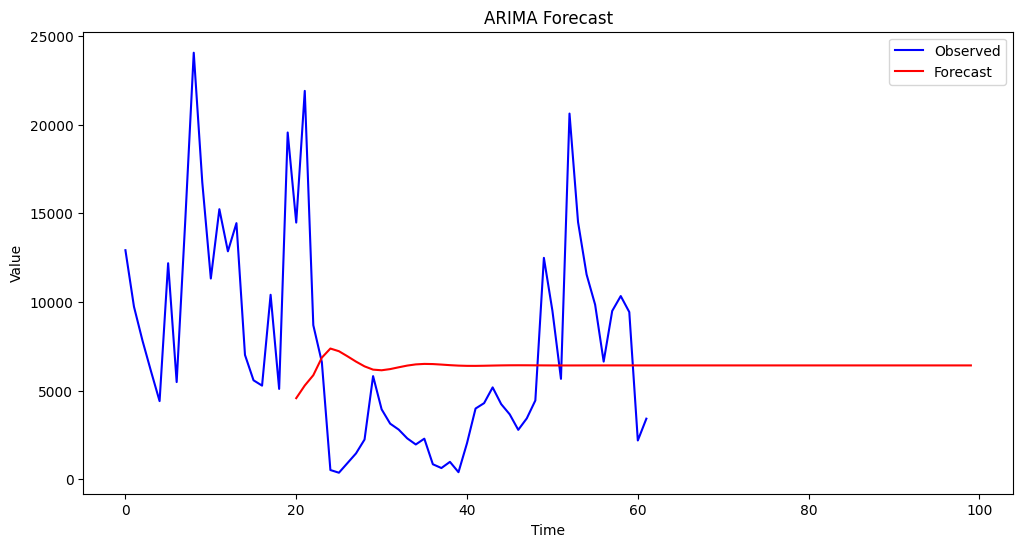

In [52]:
# Plot the forecasted values
forecast_start = 20
forecast_end = 80

# Generate forecasts
forecast = result.forecast(steps=forecast_end)

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value2'], label='Observed', color='blue')
plt.plot(range(forecast_start, forecast_start + forecast_end), forecast, label='Forecast', color='red')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()



In [53]:
data['value2_diff_12'] = data['value2'].diff(12)

In [54]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [55]:
adfuller_test(data['value2_diff_12'].dropna())

ADF Test Statistic : -3.0024437879066204
p-value : 0.0346668106299792
#Lags Used : 0
Number of Observations Used : 49
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


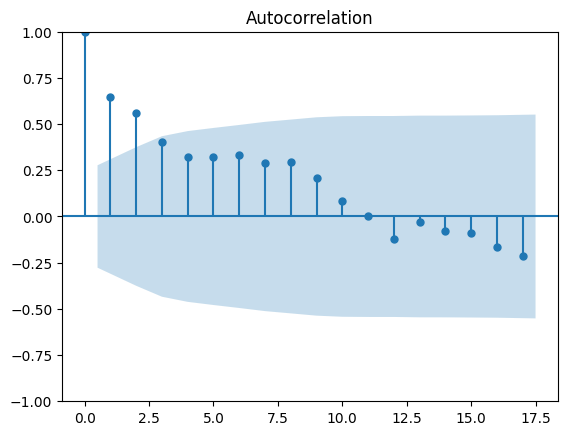

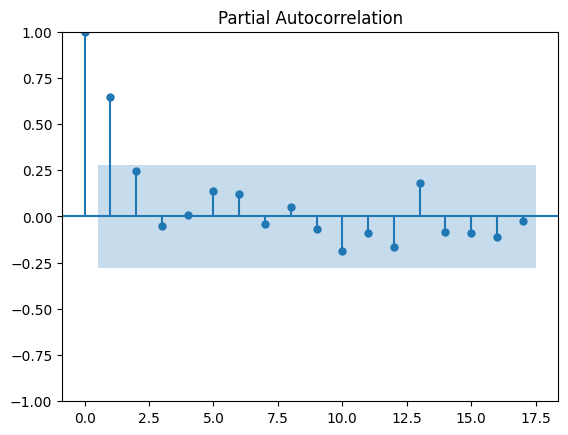

In [56]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf = plot_acf(data['value2_diff_12'].dropna())
pacf = plot_pacf(data['value2_diff_12'].dropna())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


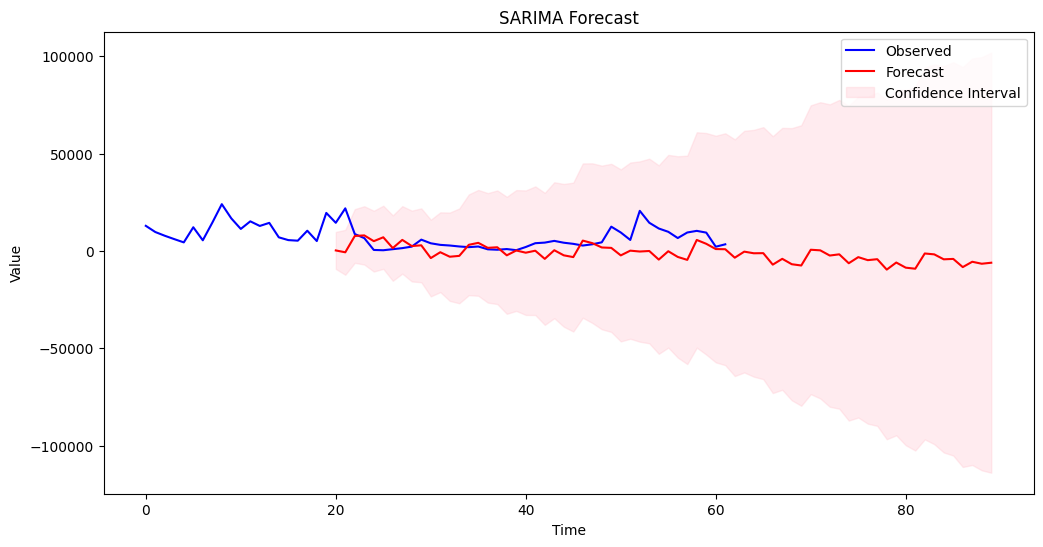

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Assuming you have your time series data loaded into 'data' DataFrame
# Replace 'data' with your actual data source

# Specify the order and seasonal_order for the SARIMA model
p, d, q = 10, 1, 2
P, D, Q, S = 10, 1, 2, 12  # Seasonal components (for example, for monthly data with a yearly seasonality)

# Create the SARIMA model
model = SARIMAX(data['value2'], order=(p, d, q), seasonal_order=(P, D, Q, S))

# Fit the model to the data
result = model.fit()

# Plot the forecasted values
forecast_start = 20
forecast_end = 70

# Generate forecasts
forecast = result.get_forecast(steps=forecast_end)

# Extract the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecasts
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['value2'], label='Observed', color='blue')
plt.plot(range(forecast_start, forecast_start + forecast_end), forecast_values, label='Forecast', color='red')
plt.fill_between(
    range(forecast_start, forecast_start + forecast_end),
    forecast_conf_int.iloc[:, 0],
    forecast_conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='Confidence Interval',
)
plt.legend()
plt.title('SARIMA Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [59]:
forecast_steps = 3  # Adjust the number of steps as needed

# Make forecasts
forecast = result.forecast(steps=forecast_steps)

# Create an index for the forecasted period
forecast_index = pd.date_range(start=data['obj_id'].max(), periods=forecast_steps + 1, freq='M')[1:]

# Print the full date along with the forecasted values
print("Forecasted Values:")
for date, value in zip(forecast_index, forecast):
    print(f"{date.strftime('%Y-%m')}: {value}")


Forecasted Values:
2023-06: 275.59303015414616
2023-07: -678.9082888488279
2023-08: 7709.533067461078
